In [12]:
df.shape                  # Rows & columns
df.columns                # Column names
df.info()                 # Data types & nulls
df.describe()             # Stats
df.isnull().sum()         # Missing values count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              714 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
 12  is_child         891 non-null    int64  
 13  FamilySize       891 non-null    int64  
 14  fare_per_person  891 non-null    float64
 15  age_group        891 non-null    object 
dtypes: float64(3), int64(7), object(6)
memory usage: 111.5+ KB


PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
is_child             0
FamilySize           0
fare_per_person      0
age_group            0
dtype: int64

In [13]:
df['Embarked'].value_counts() # See which port is most common
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [15]:
df.drop('Cabin', axis = 1, inplace = True)

Survival Analisys

In [16]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [17]:
df.groupby('Pclass')['Survived'].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [18]:
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

Visualisation:

Matplotlib is building the font cache; this may take a moment.


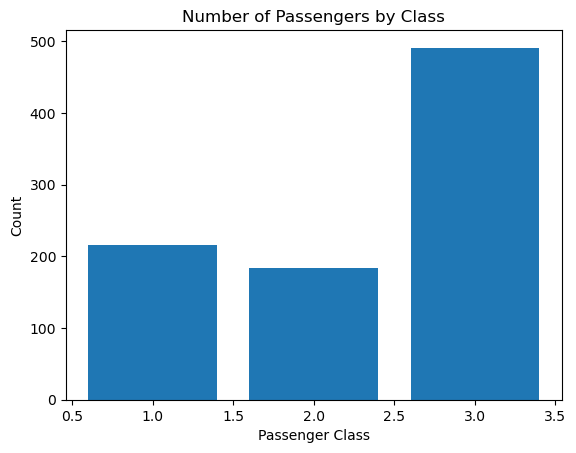

In [19]:
import matplotlib.pyplot as plt

# Count passengers per class
class_counts = df['Pclass'].value_counts().sort_index()

# Plot
plt.bar(class_counts.index, class_counts.values)
plt.title('Number of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


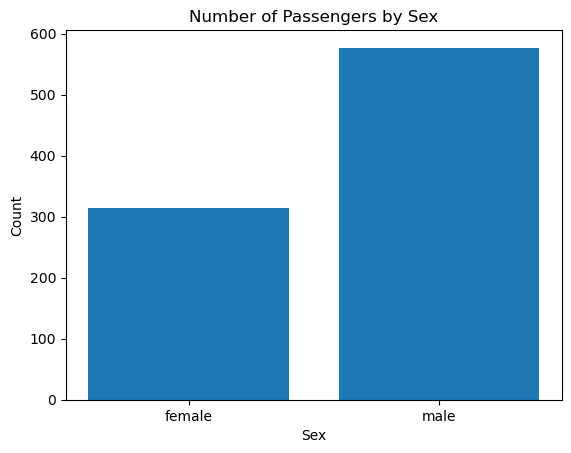

In [20]:
# Count Passenger by 

sex_counts = df['Sex'].value_counts().sort_index()


# plot
plt.bar(sex_counts.index, sex_counts.values)
plt.title('Number of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Final Touches

In [21]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [22]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})


In [23]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [24]:
df.to_csv('titanic_cleaned.csv', index=False)


In [25]:
import pandas as pd
df = pd.read_csv('/Users/sankalpajoshi/Downloads/Data Science Project Files/Titanic-Dataset.csv')


In [26]:
import numpy as np

# Create a new column with NumPy
df['is_child'] = np.where(df['Age'] < 12, 1, 0)




In [27]:
# If FamilySize doesn't exist yet, create it
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Avoid divide-by-zero using np.where
df['fare_per_person'] = df['Fare'] / np.where(df['FamilySize'] == 0, 1, df['FamilySize'])


In [28]:
df['age_group'] = np.where(df['Age'] < 18, 'Child', 'Adult')


In [29]:
survival_array = df['Survived'].to_numpy()
print("Survival Rate:", np.mean(survival_array))


Survival Rate: 0.3838383838383838


In [30]:
ages = df['Age'].to_numpy()
print("Age mean:", np.mean(ages))
print("Age std:", np.std(ages))


Age mean: nan
Age std: nan
